In [21]:
import matplotlib.pyplot as plt
import simpy
import random
import math

In [22]:
class Constants:
    max_time = 24.0  # hours
    arrival_rate = 100  # per hour
    parking_time = 2.0  # hours
    a_seed = 1234

In [23]:
class Car(object):
    """
        Cars arrives, parks for a while, and leaves
        Maintain a count of the number of parked cars as cars arrive and leave
    """

    parked_cars = 0
    data = []

    def __init__(self, env):
        self.env = env

    def visit(self, time_parking):
        Car.parked_cars += 1
        Car.data.append((self.env.now, Car.parked_cars))

        yield self.env.timeout(time_parking)

        Car.parked_cars -= 1
        Car.data.append((self.env.now, Car.parked_cars))

In [24]:
class Arrival(object):

    """
        Source generates cars at random
        Arrivals are at a time-dependent rate
    """

    def __init__(self, env):
        self.env = env

    def generate(self):
        i = 0
        while self.env.now < Constants.max_time:
            t_now = self.env.now
            arrival_rate = 100 + 10 * math.sin(math.pi * t_now/12.0)
            t = random.expovariate(arrival_rate)
            yield self.env.timeout(t)

            time_parking = random.expovariate(1.0/Constants.parking_time)
            car = Car(self.env)
            self.env.process(car.visit(time_parking))
            i += 1


class Parking(object):

    def __init__(self, env):
        self.env = env

    def run(self, aseed):
        random.seed(aseed)
        s = Arrival(self.env)
        yield self.env.process(s.generate())

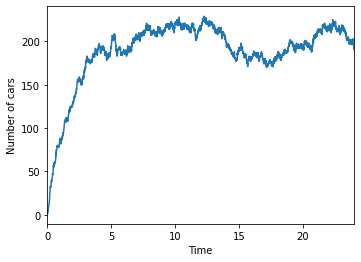

In [25]:
env = simpy.Environment()

parking = Parking(env)
env.process(parking.run(Constants.a_seed))
env.run(until=Constants.max_time)


plt.figure(figsize=(5.5, 4))
plt.plot(*zip(*Car.data))
plt.xlabel('Time')
plt.ylabel('Number of cars')
plt.xlim(0, 24)
plt.show()